<a href="https://colab.research.google.com/github/nagapurisatwika/Task-8-Clustering-with-K-Means/blob/main/Task_8_Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
print("🔹 First 5 rows:\n", X.head())


🔹 First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


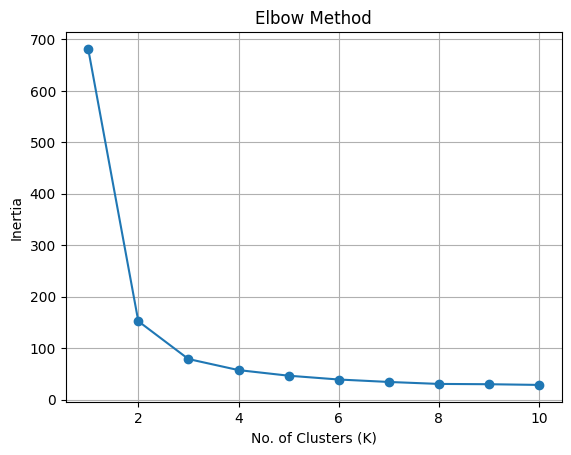

In [ ]:
inertia_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.plot(k_range, inertia_scores, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)


In [ ]:
X_clustered = X.copy()
X_clustered['Cluster'] = clusters


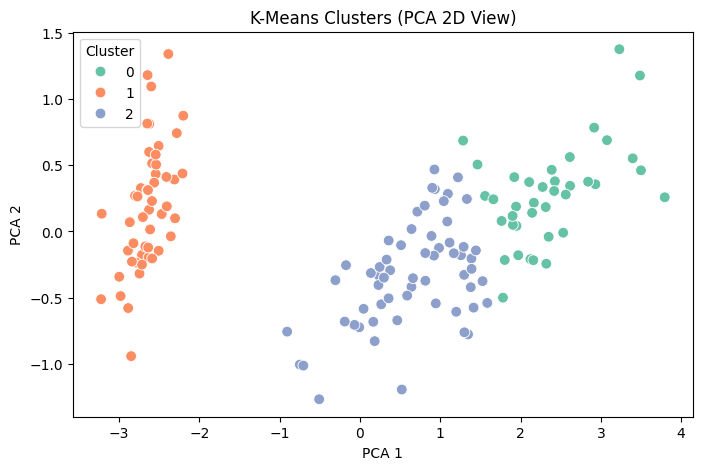

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60)
plt.title("K-Means Clusters (PCA 2D View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
score = silhouette_score(X, clusters)
print(f"🔹 Silhouette Score: {score:.3f}")


🔹 Silhouette Score: 0.551


In [ ]:
df_compare = pd.DataFrame({'Actual': iris.target, 'Cluster': clusters})
print(df_compare.head(10))


   Actual  Cluster
0       0        1
1       0        1
2       0        1
3       0        1
4       0        1
5       0        1
6       0        1
7       0        1
8       0        1
9       0        1


In [ ]:
X_clustered.to_csv("iris_clustered.csv", index=False)
print("🔹 Clustered data saved to iris_clustered.csv")


🔹 Clustered data saved to iris_clustered.csv
